In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10  # 10-layer net with 500 neurons on each layer
nonlinearities = ['relu']*len(hidden_layer_sizes)  # using tanh non-linearities

In [21]:
act = {'relu' : lambda x : np.maximum(0,x), 'tanh' : lambda x : np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]  # input at this layer
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)  # layer initialization
    
    H = np.dot(X,W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H

input layer had mean -0.000483 and std 1.000784
hidden layer 1 had mean 0.565592 and std 0.827082
hidden layer 2 had mean 0.580784 and std 0.835481
hidden layer 3 had mean 0.560283 and std 0.838919
hidden layer 4 had mean 0.536268 and std 0.796820
hidden layer 5 had mean 0.545403 and std 0.807929
hidden layer 6 had mean 0.611280 and std 0.848919
hidden layer 7 had mean 0.616744 and std 0.871802
hidden layer 8 had mean 0.603469 and std 0.873614
hidden layer 9 had mean 0.639676 and std 0.983653
hidden layer 10 had mean 0.650508 and std 0.966950


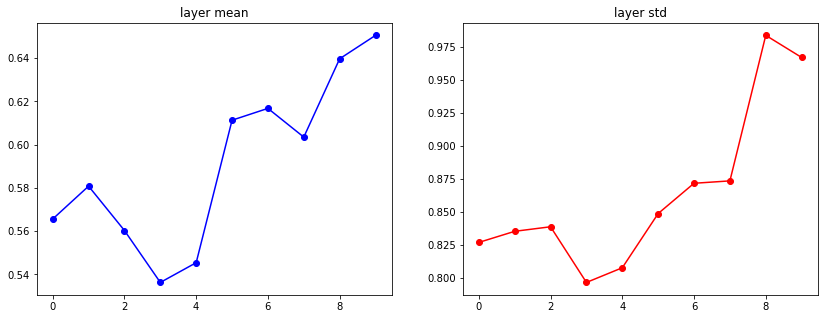

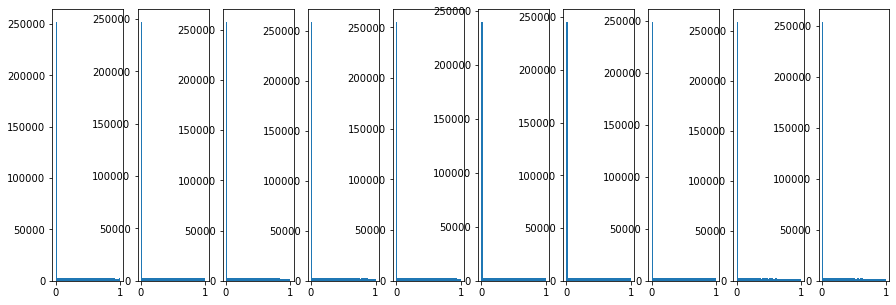

In [22]:
print("input layer had mean %f and std %f" % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i,H in Hs.items()]
layer_stds = [np.std(H) for i,H in Hs.items()]
for i,H in Hs.items():
    print("hidden layer %d had mean %f and std %f" % (i+1, layer_means[i], layer_stds[i]))
    
    
# plot the means and standard deviations
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(),layer_stds, 'or-')
plt.title('layer std')


# plot the raw distributions
plt.figure(figsize=(15,5))
for i,H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 50, range=(0,1))